In [16]:
#Importing important Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [17]:
#Loading the Data $ Checking the top five role
df= pd.read_csv('Arizona_Final_Incentives_Public_cleaned.csv')
df.head()


,Program Name,Implementing Sector,Incentive Type,Web Site,Eligible Renewable/Other Technologies,Applicable Sectors,Administrator,Additional Details,State,city,...,Nonprofit,Residential,Retail Supplier,Schools,Senior citizens,State Government,Tribal Government,Eligible Renewable/Other Technologies (Clustered),Additional Details (Without None),Relations Between Renewable Technologies and Additional Details
0,Renewable Energy Standard,State,Renewables Portfolio Standard,https://www.azcc.gov/utilities/electric/renewa...,"Solar Water Heat, Solar Space Heat, Geothermal...","Investor-Owned Utility, Retail Supplier",No Info,Category: Regulatory Policy; Standard: 15% by ...,Arizona,Alpine,...,0,0,1,0,0,0,0,"Fuel Cells, Geothermal, Wind, Combined Heat & ...",Category: Regulatory Policy; Standard: 15% by ...,NaN
1,Energy-Efficient New Homes Tax Credit for Home...,Federal,Corporate Tax Credit,No Info,No Info,Construction,U.S. Internal Revenue Service,Category: Financial Incentive; Standard: None;...,Arizona,Alpine,...,0,0,0,0,0,0,0,No Info,Category: Financial Incentive; Start Date: 01/...,NaN
2,Qualified Commercial Clean Vehicle Tax Credit,Federal,Corporate Tax Credit,https://www.irs.gov/credits-deductions/commerc...,No Info,"Commercial, Industrial, Local Government, Nonp...",No Info,Category: Financial Incentive; Standard: None;...,Arizona,Alpine,...,1,0,0,0,0,1,1,No Info,Category: Financial Incentive; Start Date: 01/...,NaN
3,Alternative Fuel Vehicle Refueling Property Ta...,Federal,Corporate Tax Credit,https://www.irs.gov/credits-deductions/alterna...,No Info,"Commercial, Industrial, Local Government, Nonp...",No Info,Category: Financial Incentive; Standard: None;...,Arizona,Alpine,...,1,0,0,0,0,1,1,No Info,Category: Financial Incentive; Start Date: 01/...,NaN
4,Renewable Electricity Production Tax Credit (PTC),Federal,Corporate Tax Credit,https://www.energy.gov/eere/solar/federal-sola...,"Geothermal Electric, Solar Thermal Electric, S...","Commercial, Industrial",U.S. Internal Revenue Service,Category: Financial Incentive; Standard: None;...,Arizona,Alpine,...,0,0,0,0,0,0,0,"Marine, Geothermal, Wind, Biomass, Solar, Hydr...",Category: Financial Incentive; Incentive Amoun...,{'Biomass': ['Incentive Amount: Systems Commen...


In [18]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23845 entries, 0 to 23844
Data columns (total 35 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Program Name                                                     23845 non-null  object
 1   Implementing Sector                                              23845 non-null  object
 2   Incentive Type                                                   23845 non-null  object
 3   Web Site                                                         23845 non-null  object
 4   Eligible Renewable/Other Technologies                            23845 non-null  object
 5   Applicable Sectors                                               23845 non-null  object
 6   Administrator                                                    23845 non-null  object
 7   Additional Details                               

In [19]:
#Checking for missing value
df.isnull().sum()

Program Name                                                           0
Implementing Sector                                                    0
Incentive Type                                                         0
Web Site                                                               0
Eligible Renewable/Other Technologies                                  0
Applicable Sectors                                                     0
Administrator                                                          0
Additional Details                                                     0
State                                                                  0
city                                                                   0
zipcode                                                                0
county                                                                 0
Agricultural                                                           0
Commercial                                         

In [20]:
print(df['Relations Between Renewable Technologies and Additional Details'])

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4        {'Biomass': ['Incentive Amount: Systems Commen...
                               ...                        
23840                                                  NaN
23841                                                  NaN
23842                                                  NaN
23843                                                  NaN
23844                                                  NaN
Name: Relations Between Renewable Technologies and Additional Details, Length: 23845, dtype: object


In [21]:
#Droppingn the because it has to much NAN and its not relivant to our model 
new_df = df.drop('Relations Between Renewable Technologies and Additional Details', axis=1)

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23845 entries, 0 to 23844
Data columns (total 34 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Program Name                                       23845 non-null  object
 1   Implementing Sector                                23845 non-null  object
 2   Incentive Type                                     23845 non-null  object
 3   Web Site                                           23845 non-null  object
 4   Eligible Renewable/Other Technologies              23845 non-null  object
 5   Applicable Sectors                                 23845 non-null  object
 6   Administrator                                      23845 non-null  object
 7   Additional Details                                 23845 non-null  object
 8   State                                              23845 non-null  object
 9   city             

In [23]:
#Checking the corrolationd of our Dataset and Visualizing it as a Heatmap for clearity
new_df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_17212\325370067.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()


,zipcode,Agricultural,Commercial,Construction,Cooperative Utilities,Federal Government,Industrial,Installers/Contractors,Institutional,Investor-Owned Utility,...,Low Income Residential,Multifamily Residential,Municipal Utilities,Nonprofit,Residential,Retail Supplier,Schools,Senior citizens,State Government,Tribal Government
zipcode,1.000000,0.007326,-0.000567,-0.009581,0.004800,0.001326,0.004600,0.004842,0.003705,0.004303,...,-0.018759,-0.008437,0.002628,0.005938,-0.007002,0.001963,0.005826,0.002188,0.009201,0.007837
Agricultural,0.007326,1.000000,0.537846,0.060074,0.150851,0.343873,0.373155,-0.083595,0.571108,0.208114,...,-0.172682,-0.188169,0.144079,0.258668,-0.137070,-0.080300,0.412267,0.280086,0.314494,-0.028441
Commercial,-0.000567,0.537846,1.000000,0.158732,0.285456,0.169060,0.640653,0.164587,0.342078,0.063426,...,-0.235415,-0.259026,0.044943,0.480974,-0.031110,-0.121612,0.219125,0.182321,0.379104,0.104988
Construction,-0.009581,0.060074,0.158732,1.000000,0.178102,0.385967,0.004004,-0.042893,0.146810,0.217743,...,-0.089656,-0.051589,0.358591,-0.108378,-0.239608,-0.041203,-0.108358,-0.041082,0.244553,0.062339
Cooperative Utilities,0.004800,0.150851,0.285456,0.178102,1.000000,0.034720,0.320071,-0.055003,0.070560,0.636808,...,-0.112700,-0.128345,0.612209,0.273440,-0.305558,-0.052835,-0.135422,-0.052681,0.290583,0.321490
Federal Government,0.001326,0.343873,0.169060,0.385967,0.034720,1.000000,0.071778,-0.069106,0.527131,0.072833,...,-0.142911,-0.126732,0.194110,0.190486,-0.125901,-0.066382,0.364175,0.338807,0.453870,0.052423
Industrial,0.004600,0.373155,0.640653,0.004004,0.320071,0.071778,1.000000,-0.118095,0.380368,0.090291,...,-0.241235,-0.239003,0.063562,0.523025,-0.086358,-0.111659,0.255981,0.198261,0.327173,0.150701
Installers/Contractors,0.004842,-0.083595,0.164587,-0.042893,-0.055003,-0.069106,-0.118095,1.000000,-0.061311,-0.048639,...,-0.051097,-0.057042,-0.033673,-0.061767,0.178274,-0.023482,-0.061756,-0.023414,-0.088803,-0.082875
Institutional,0.003705,0.571108,0.342078,0.146810,0.070560,0.527131,0.380368,-0.061311,1.000000,0.108142,...,-0.128154,-0.143064,0.232682,0.608427,0.052100,-0.056374,0.797429,0.381882,0.683522,0.260013
Investor-Owned Utility,0.004303,0.208114,0.063426,0.217743,0.636808,0.072833,0.090291,-0.048639,0.108142,1.000000,...,-0.098662,-0.113495,0.692311,-0.119867,-0.269254,0.479766,-0.118546,-0.046586,0.004757,0.021983


C:\Users\user\AppData\Local\Temp\ipykernel_17212\2717532783.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


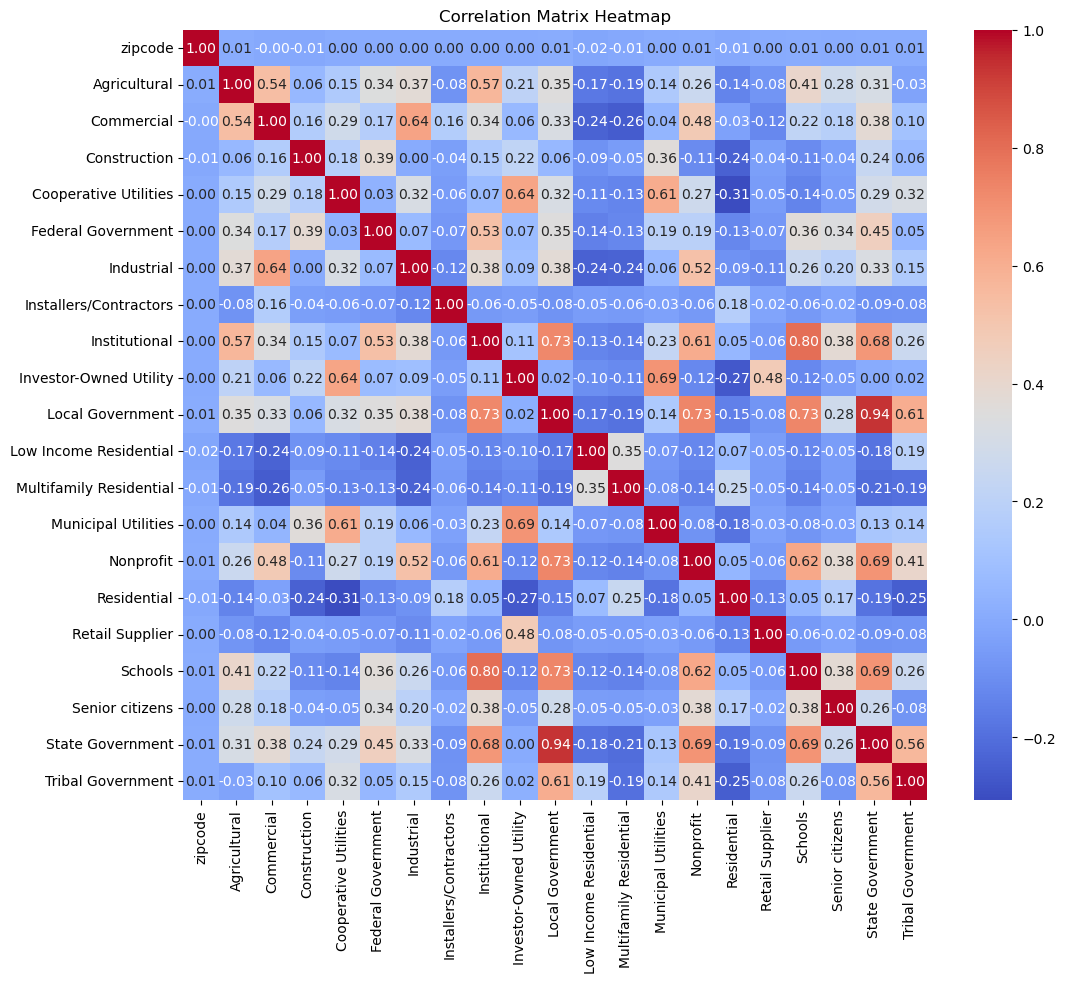

In [24]:


plt.figure(figsize=(12, 10))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


# KEY OBSERVATION

   ##Diagonal Values:
        The diagonal values are all 1.000, indicating a perfect correlation of each variable with itself.

   ##Positive Correlations:
        Agricultural & Commercial (0.537846): This suggests a moderate positive correlation, meaning that areas or sectors with agricultural incentives also tend to have commercial incentives.
        Agricultural & Institutional (0.571108): This indicates a strong positive correlation, suggesting that where agricultural incentives are available, institutional incentives are also likely present.
        Institutional & Schools (0.797429): A very strong positive correlation, implying that schools and institutions often have similar incentives.

   ##Negative Correlations:
        Low Income Residential & Agricultural (-0.172682): This suggests a weak negative correlation, indicating that areas with low-income residential incentives are less likely to have agricultural incentives.
        Residential & Investor-Owned Utility (-0.269254): This shows a moderate negative correlation, meaning that residential incentives are less likely to be associated with investor-owned utility incentives.

    ##Near-Zero Correlations:
        Zipcode & Commercial (-0.000567): This near-zero correlation indicates that there’s almost no linear relationship between the zipcode and commercial incentives.
        Zipcode & Installers/Contractors (0.004842): Similarly, there’s almost no relationship between zipcode and incentives for installers/contractors.

In [28]:
# Replace non-numeric values like "No Info"
new_df.replace('No Info', np.nan, inplace=True)

In [29]:
# Separate features and target variable
X = new_df.drop(columns=['Incentive Type'])
y = new_df['Incentive Type']

In [30]:
# Encode categorical features and the target variable
categorical_columns = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  #This leaves the numeric columns unchanged
)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

#Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [34]:
# Traing the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# 8. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Handle the mismatch by using the unique labels in y_test
unique_labels = np.unique(y_test)
target_names = label_encoder.inverse_transform(unique_labels)

report = classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names)

print(f"Model Accuracy: {accuracy}")
print("\nClassification Report:\n", report)



Model Accuracy: 1.0

Classification Report:
                           precision    recall  f1-score   support

    Corporate Tax Credit       1.00      1.00      1.00       303
 Corporate Tax Exemption       1.00      1.00      1.00       173
           Grant Program       1.00      1.00      1.00       453
Green Building Incentive       1.00      1.00      1.00         4
            Loan Program       1.00      1.00      1.00       764
          PACE Financing       1.00      1.00      1.00         8
     Personal Tax Credit       1.00      1.00      1.00       468
  Personal Tax Exemption       1.00      1.00      1.00       172
    Public Benefits Fund       1.00      1.00      1.00         2
          Rebate Program       1.00      1.00      1.00       147

                accuracy                           1.00      2494
               macro avg       1.00      1.00      1.00      2494
            weighted avg       1.00      1.00      1.00      2494

